In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd
a=pd.read_csv("/content/diabetes.csv")
print(a)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [49]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


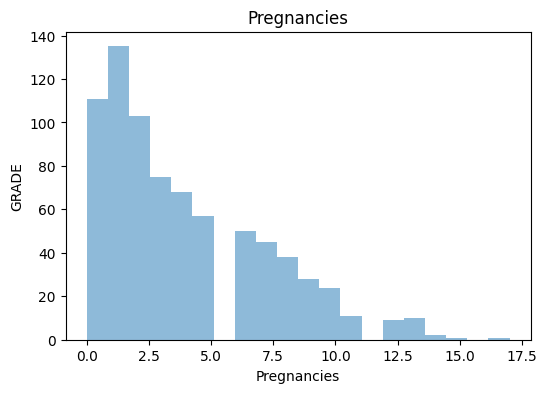

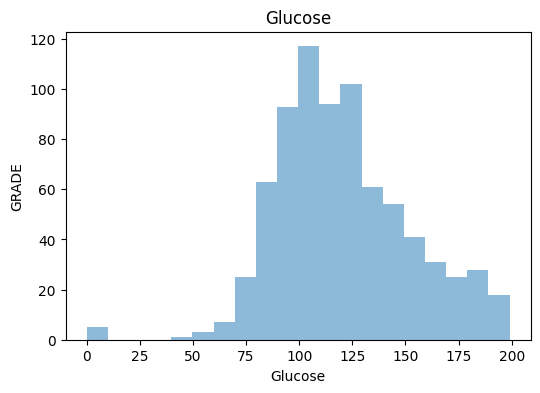

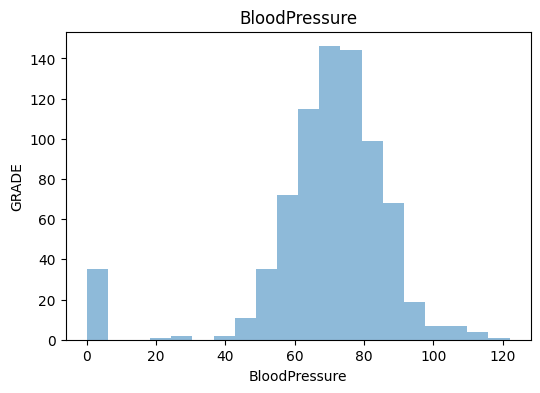

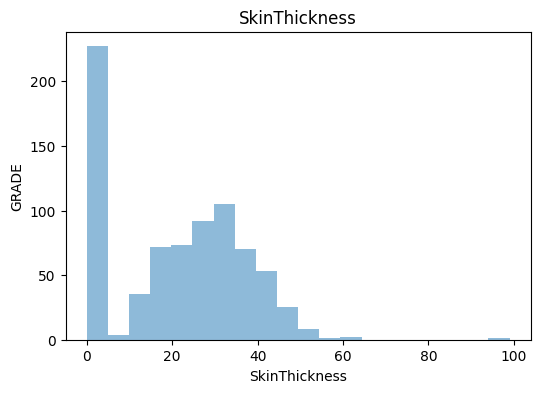

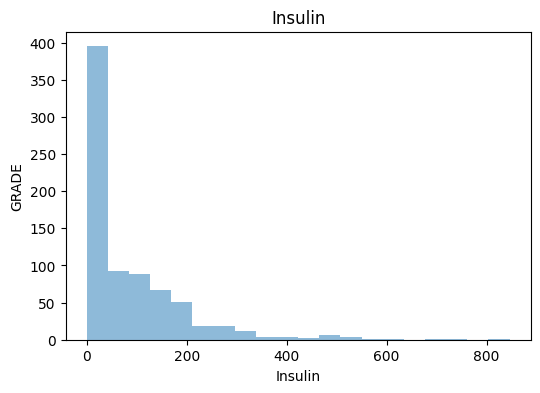

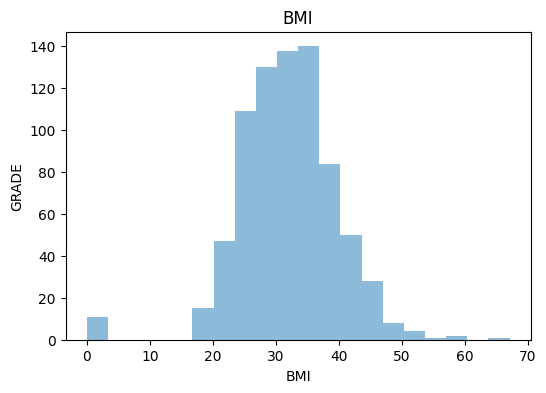

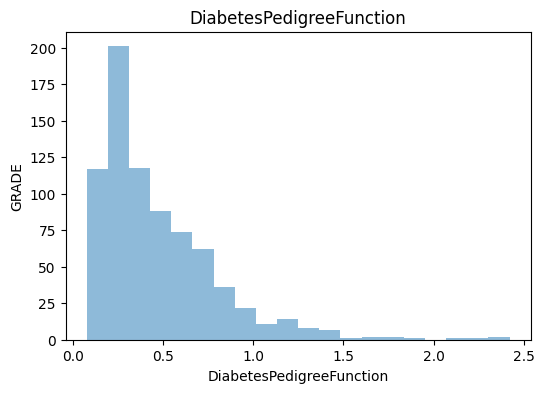

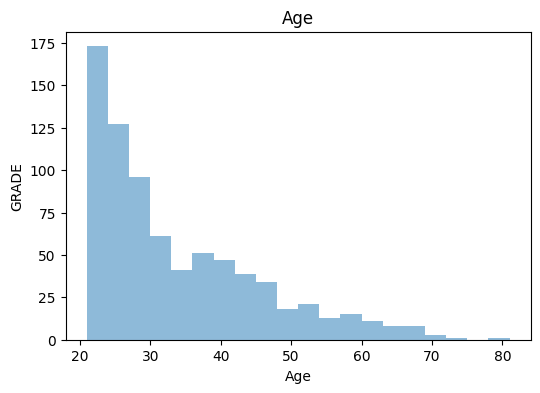

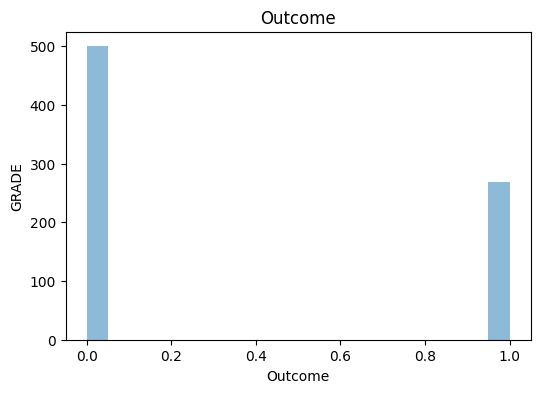

<Figure size 600x400 with 0 Axes>

In [50]:
import matplotlib.pyplot as plt
for column in a.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(a[column], bins=20, alpha=0.5)
    plt.xlabel(column)
    plt.ylabel("GRADE")
    plt.title(f"{column}")
    plt.show()
plt.figure(figsize=(6, 4))
plt.show()

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
X = a.drop('Outcome', axis=1)
y = a['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [54]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_LR = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_LR)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7532467532467533
Accuracy: 0.7532467532467533
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



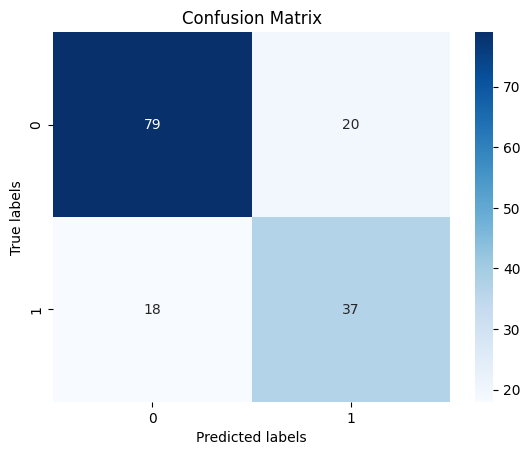

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

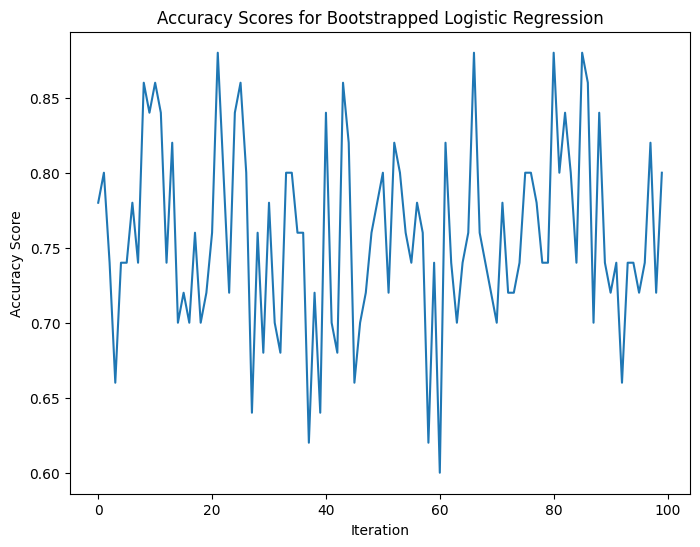

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np

n_bootstrap_samples = 50
n_iterations = 100
model = LogisticRegression()
model.fit(X_test, y_test)

accuracy_scores = []

for _ in range(n_iterations):
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)


    y_p = model.predict(X_resampled)

    accuracy = accuracy_score(y_resampled, y_p)
    accuracy_scores.append(accuracy)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped Logistic Regression")
plt.show()

In [56]:
#################################### supoort vector machines####################
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [58]:
# Separate features and target variable
X = a.drop('Outcome', axis=1)
y = a['Outcome']

# Splitting dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize and train the SVM model
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)


SVC(random_state=42)

In [60]:
# Predicting the test set results
y_pred = model.predict(X_test)
accuracy_SVM = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_SVM)
# Evaluating the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 0.7987012987012987
Accuracy: 0.7987012987012987
Confusion Matrix:
[[87 12]
 [19 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        99
           1       0.75      0.65      0.70        55

    accuracy                           0.80       154
   macro avg       0.79      0.77      0.77       154
weighted avg       0.80      0.80      0.80       154



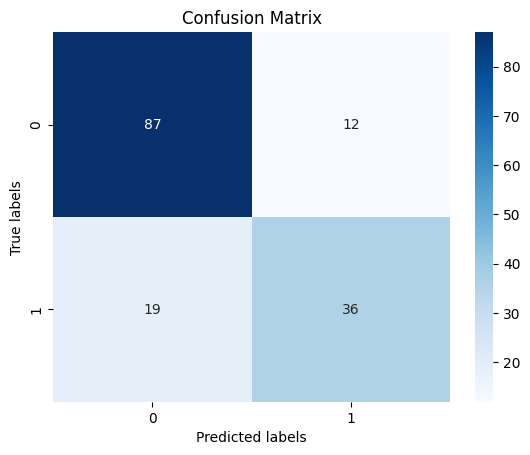

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

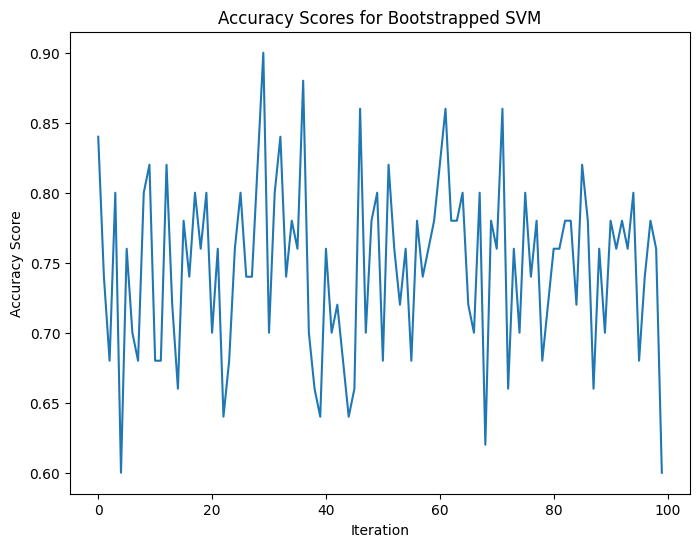

In [62]:
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

n_bootstrap_samples = 50
n_iterations = 100

# Create an SVM model
model = SVC()

# Fit the SVM model to your test data (x_test, y_test)
model.fit(X_test, y_test)

accuracy_scores = []

for _ in range(n_iterations):
    # Resample the training data
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)

    # Predict using the SVM model
    y_p = model.predict(X_resampled)

    # Calculate accuracy score
    accuracy = accuracy_score(y_resampled, y_p)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped SVM")
plt.show()

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [65]:
X = a.drop('Outcome', axis=1)  # Features
y = a['Outcome']  # Target

# Splitting dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Note: Decision trees don't require feature scaling, but it's good practice when comparing models.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train_scaled, y_train)






DecisionTreeClassifier(random_state=42)

In [66]:
# Predict on the test set
y_pred = tree_model.predict(X_test_scaled)
accuracy_DT = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_DT)
# Evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 0.7467532467532467
Accuracy: 0.7467532467532467
Confusion Matrix:
[[75 24]
 [15 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



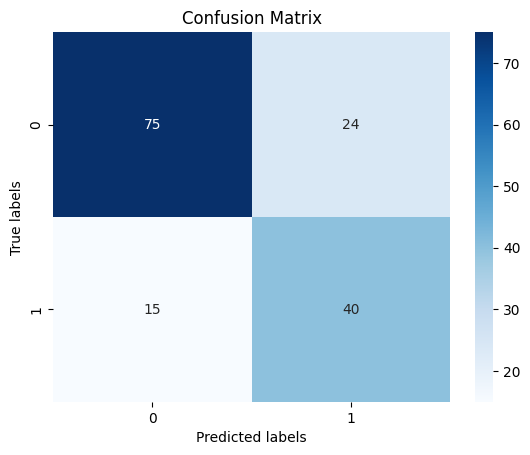

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

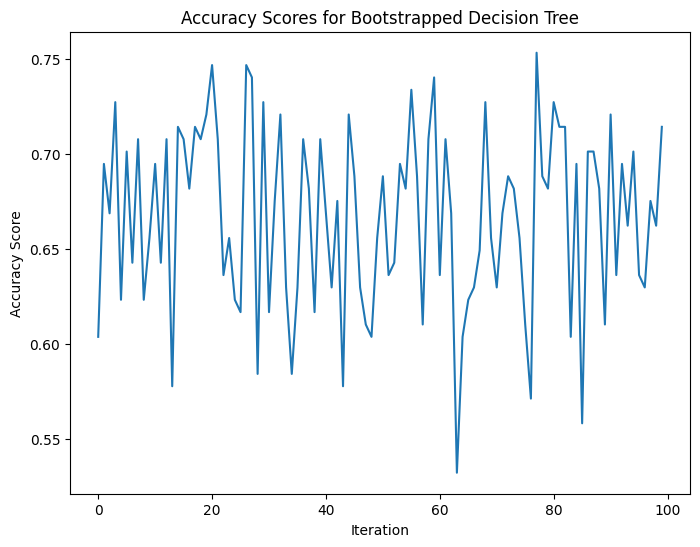

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

n_bootstrap_samples = 50
n_iterations = 100

# Create a Decision Tree model
model = DecisionTreeClassifier()

accuracy_scores = []

for _ in range(n_iterations):
    # Resample the training data
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)

    # Fit the Decision Tree model to resampled data
    model.fit(X_resampled, y_resampled)

    # Predict using the Decision Tree model on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped Decision Tree")
plt.show()

In [69]:
# naive bayes #
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [70]:
# Features and target variable
X = a.drop('Outcome', axis=1)
y = a['Outcome']

# Splitting dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
# Although normalization is not strictly required for Naive Bayes, it can be beneficial, especially for Gaussian Naive Bayes
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

In [71]:
# Predicting the test set results
y_pred = gnb.predict(X_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_NB)
# Evaluating the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 0.7662337662337663
Accuracy: 0.7662337662337663
Confusion Matrix:
[[79 20]
 [16 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



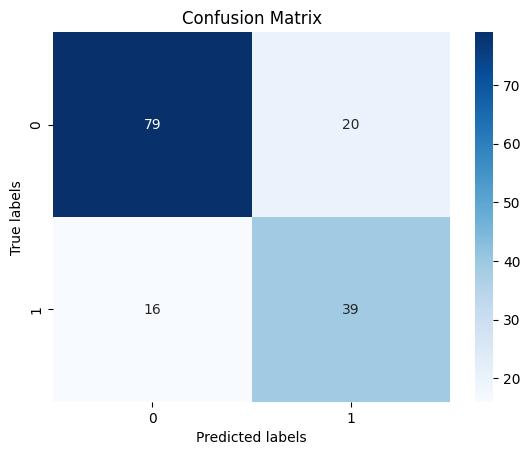

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

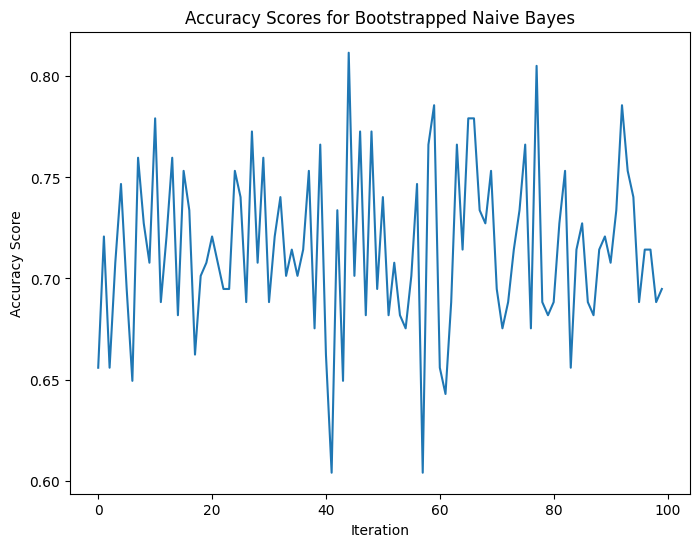

In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

n_bootstrap_samples = 50
n_iterations = 100

# Create a Naive Bayes model
model = GaussianNB()

accuracy_scores = []

for _ in range(n_iterations):
    # Resample the training data
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)

    # Fit the Naive Bayes model to resampled data
    model.fit(X_resampled, y_resampled)

    # Predict using the Naive Bayes model on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped Naive Bayes")
plt.show()


In [74]:
#multi-layer perceptrons#
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [75]:
# Splitting the dataset into features and target variable
X = a.drop('Outcome', axis=1)
y = a['Outcome']

# Splitting dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)

# Train the model
mlp.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=42)

In [76]:
# Predictions
y_pred = mlp.predict(X_test)
accuracy_P = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_P)
# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 0.7402597402597403
Accuracy: 0.7402597402597403
Confusion Matrix:
[[80 19]
 [21 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        99
           1       0.64      0.62      0.63        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



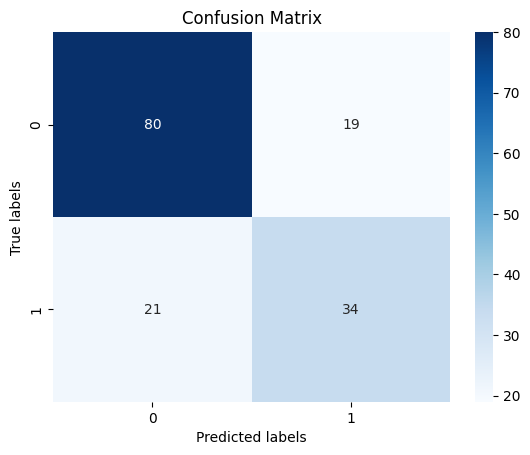

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

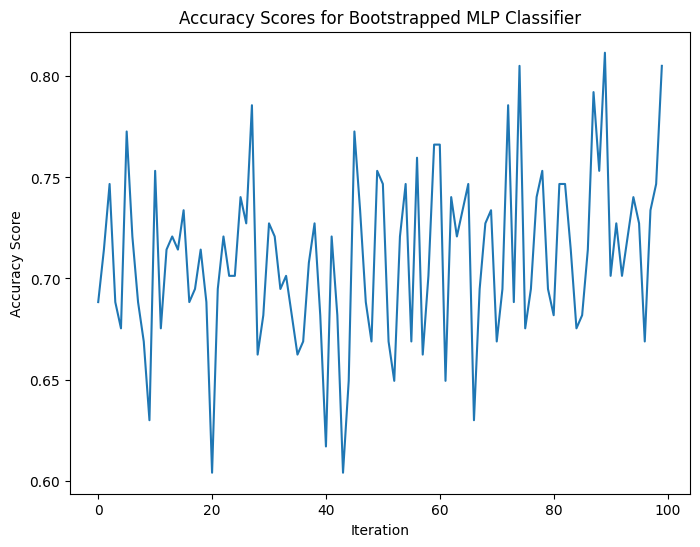

In [78]:
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

n_bootstrap_samples = 50
n_iterations = 100

# Create an MLP classifier model
model = MLPClassifier()

accuracy_scores = []

for _ in range(n_iterations):
    # Resample the training data
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)

    # Fit the MLP classifier model to resampled data
    model.fit(X_resampled, y_resampled)

    # Predict using the MLP classifier model on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped MLP Classifier")
plt.show()


In [79]:
pip install xgboost


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


In [81]:
X = a.drop('Outcome', axis=1)  # Features
y = a['Outcome']  # Target

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model to the training data
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [82]:
# Predicting the Test set results
y_pred = model.predict(X_test)
accuracy_XGB = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_XGB)
# Evaluating the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 0.7077922077922078
Accuracy: 0.7077922077922078
Confusion Matrix:
[[73 26]
 [19 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



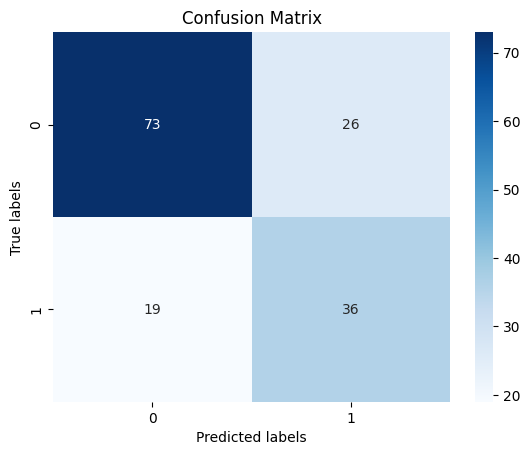

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


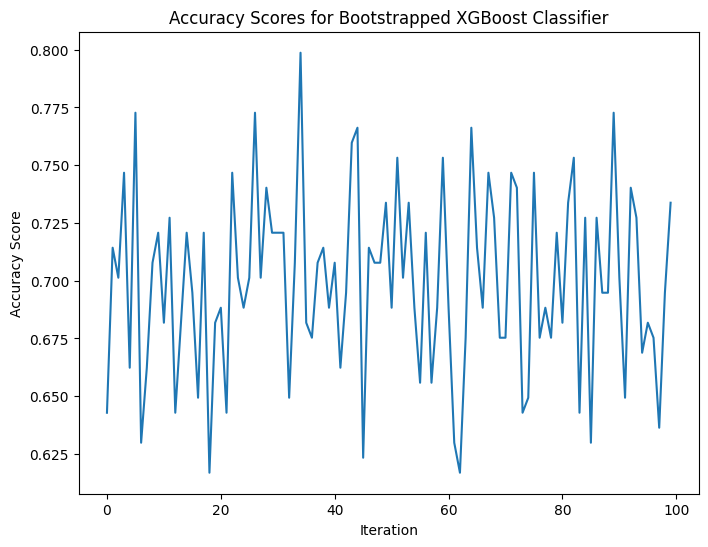

In [84]:
import xgboost as xgb
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

n_bootstrap_samples = 50
n_iterations = 100

# Create an XGBoost classifier model
model = xgb.XGBClassifier()

accuracy_scores = []

for _ in range(n_iterations):
    # Resample the training data
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)

    # Fit the XGBoost classifier model to resampled data
    model.fit(X_resampled, y_resampled)

    # Predict using the XGBoost classifier model on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped XGBoost Classifier")
plt.show()


In [85]:
pip install lightgbm


In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [87]:



# Splitting the dataset into features and target variable
X =a.drop(['Outcome'], axis=1)
y = a['Outcome']

# Splitting dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
accuracy_LGBM = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_LGBM)
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Accuracy: 0.7337662337662337


In [88]:
# Creating LightGBM dataset from the training data
train_data = lgb.Dataset(X_train, label=y_train)

# Setting parameters
# Note: These are basic parameters. LightGBM offers a wide range of parameters that can be tuned for improved performance.
params = {
'objective': 'binary',
'metric': 'binary_logloss',
'boosting': 'gbdt',
'learning_rate': 0.05,
'num_leaves': 31,
'max_depth': -1,
}

# Train the model
gbm = lgb.train(params, train_data, num_boost_round=100)

# Predicting on the test set
y_pred = gbm.predict(X_test)
# Converting probabilities to class labels based on a threshold (0.5)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred]


[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [89]:
# Evaluating the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 0.7402597402597403
Confusion Matrix:
[[76 23]
 [17 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



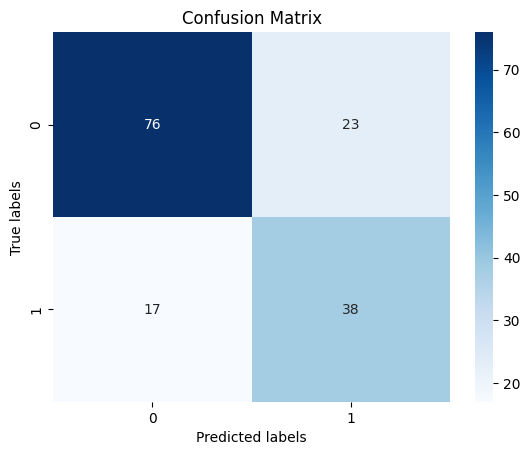

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

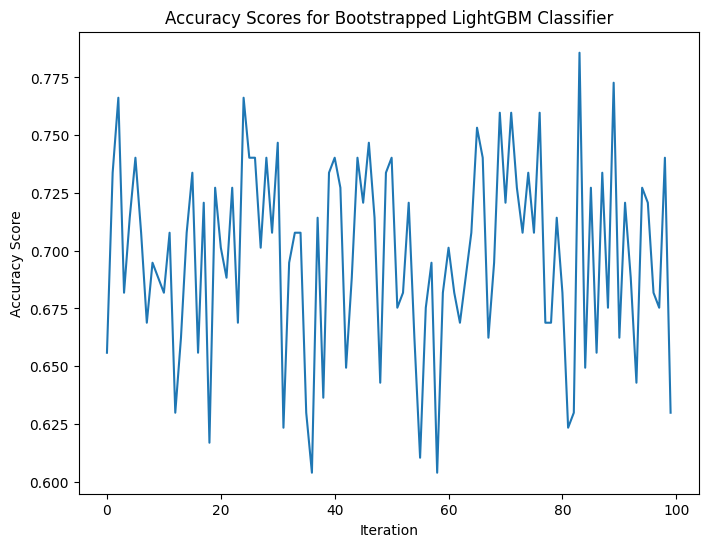

In [91]:
import lightgbm as lgb
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

n_bootstrap_samples = 50
n_iterations = 100

# Create a LightGBM classifier model
model = lgb.LGBMClassifier()

accuracy_scores = []

for _ in range(n_iterations):
    # Resample the training data
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)

    # Fit the LightGBM classifier model to resampled data
    model.fit(X_resampled, y_resampled)

    # Predict using the LightGBM classifier model on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped LightGBM Classifier")
plt.show()


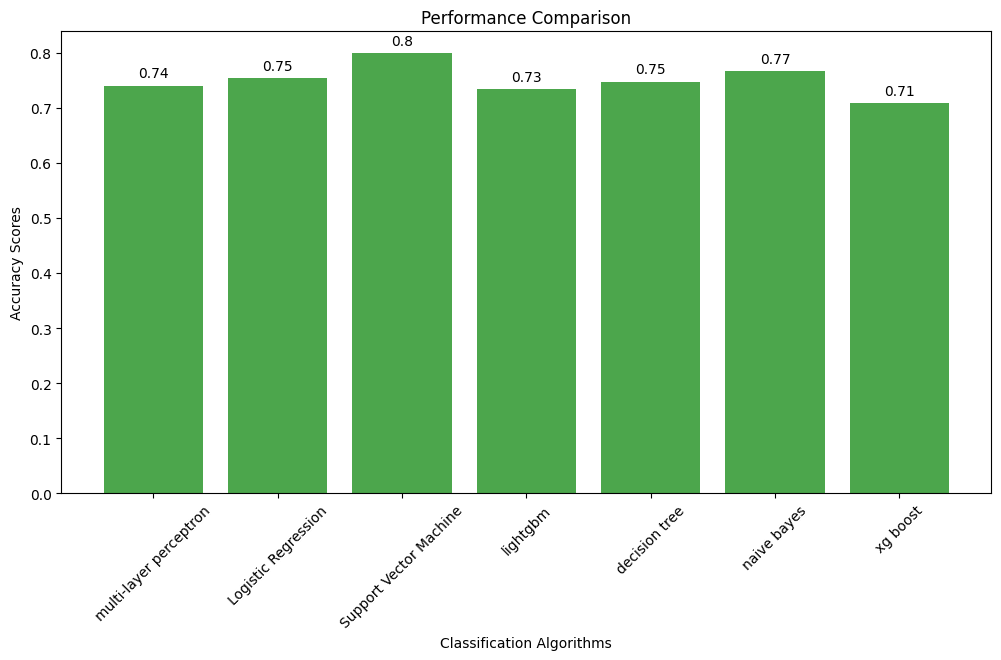

In [92]:
import matplotlib.pyplot as plt

algorithm_names = ['multi-layer perceptron', 'Logistic Regression', 'Support Vector Machine','lightgbm','decision tree','naive bayes','xg boost']
accuracy_scores = [accuracy_P, accuracy_LR, accuracy_SVM,accuracy_LGBM,accuracy_DT,accuracy_NB,accuracy_XGB]

plt.figure(figsize=(12, 6))

# Bar chart for accuracy scores
plt.bar(algorithm_names, accuracy_scores, color='Green', alpha=0.7)
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy Scores')
plt.title('Performance Comparison')

# Adding data labels
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


Confusion Matrix : 
 [[67 32]
 [25 30]]


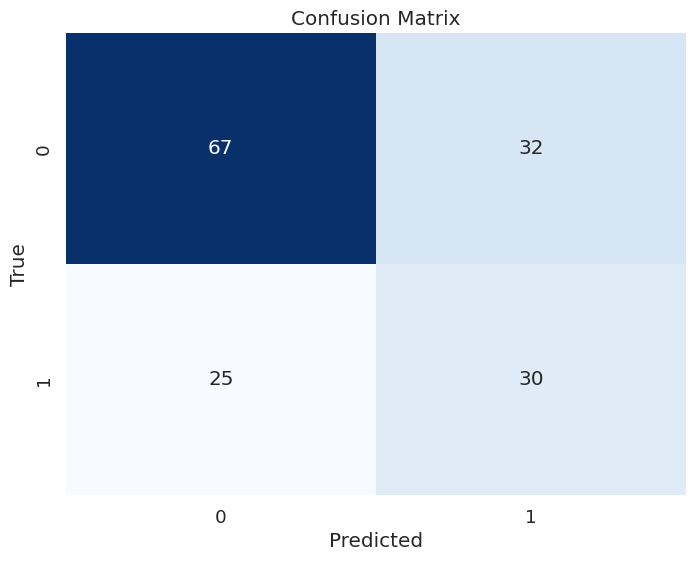

Accuracy: 0.6298701298701299
Precision: 0.6409787617711881
Recall: 0.6298701298701299
F1-score: 0.6341599064112153


In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print precision
precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
print("Precision:", precision)

# Calculate and print recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate and print F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

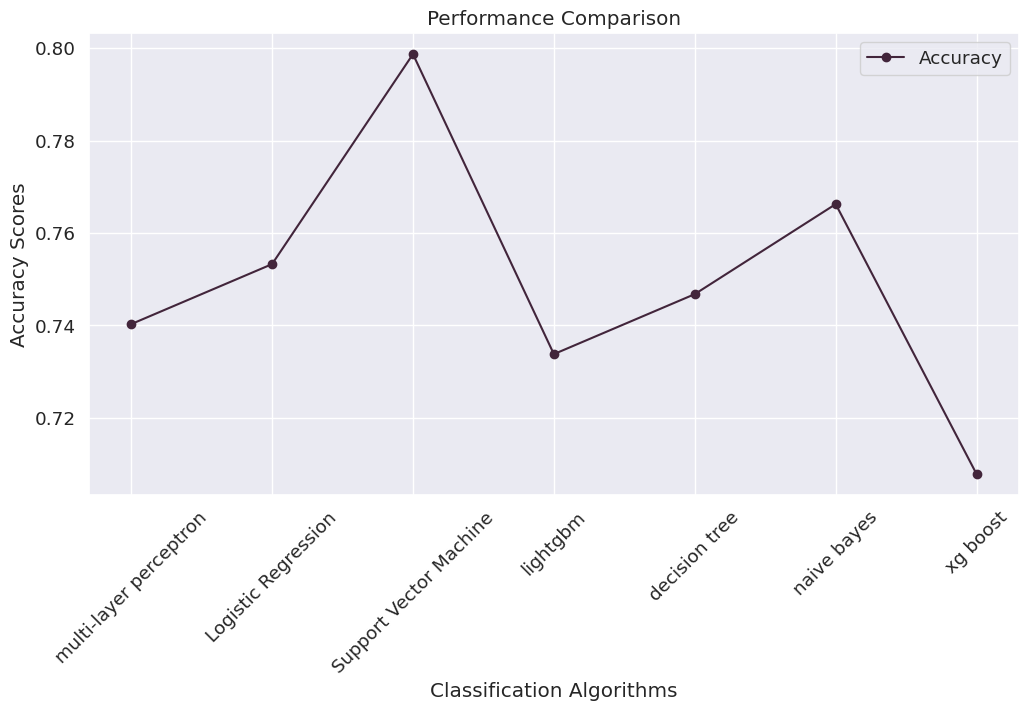

In [94]:
algorithm_names = ['multi-layer perceptron', 'Logistic Regression', 'Support Vector Machine','lightgbm','decision tree','naive bayes','xg boost']
accuracy_scores = [accuracy_P, accuracy_LR, accuracy_SVM,accuracy_LGBM,accuracy_DT,accuracy_NB,accuracy_XGB]

plt.figure(figsize=(12, 6))
# Accuracy scores plot
plt.plot(algorithm_names, accuracy_scores, label = 'Accuracy', marker = 'o', color = '#42253B')
plt.xlabel( 'Classification Algorithms' )
plt.ylabel( 'Accuracy Scores' )
plt.title( 'Performance Comparison' )
# Adding a legend
plt.legend()

# Rotating the x-axis labels for better visibility
plt.xticks( rotation = 45 )

# Displaying the plot

plt.show ()
